In [11]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

ox.__version__

'1.3.0'

In [2]:
# download a street network then solve a shortest-path route on it
weight = "length"
G = ox.graph_from_place("Piedmont, CA, USA", network_type="drive")
orig = list(G.nodes)[0]
dest = list(G.nodes)[-1]
route = ox.shortest_path(G, orig, dest, weight=weight)

In [4]:
# explore graph edges interactively, with a simple one-liner
ox.graph_to_gdfs(G, nodes=False).explore()

In [5]:

# explore graph nodes interactively, with different basemap tiles
nodes = ox.graph_to_gdfs(G, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 8})

In [6]:
# explore nodes and edges together in a single map
nodes, edges = ox.graph_to_gdfs(G)
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [7]:
# explore graph edges interactively, colored by length
edges.explore(tiles="cartodbdarkmatter", column="length", cmap="plasma")


In [8]:
# explore graph nodes interactively, colored by betweenness centrality
nx.set_node_attributes(G, nx.betweenness_centrality(G, weight="length"), name="bc")
nodes = ox.graph_to_gdfs(G, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

In [18]:
# define some options
place = "Pasadena, CA, USA"
tiles = "cartodbdarkmatter"
mk = {"radius": 6}

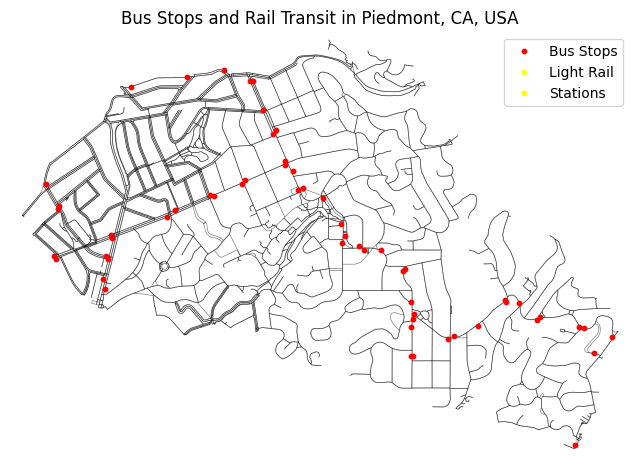

In [21]:
import osmnx as ox

# Define the place for which you want to retrieve the map data
place = "Piedmont, CA, USA"

# Set up the map parameters
tiles = "CartoDB Positron"  # Specify the map tiles to use
mk = {"radius": 5, "color": "blue", "fill_color": "blue"}  # Marker properties for bus stops and rail stations

# Fetch bus stops, light rail, and stations as features
bus_stops = ox.geometries_from_place(place, tags={"highway": "bus_stop"})
light_rail = ox.geometries_from_place(place, tags={"railway": "light_rail"})
stations = ox.geometries_from_place(place, tags={"railway": "station"})

# Create a plot for bus stops, light rail, and stations on the same map
fig, ax = ox.plot_graph(
    ox.graph_from_place(place, network_type="all"),
    show=False, close=False, edge_color='black', edge_linewidth=0.5,
    edge_alpha=0.5, node_size=0, node_color='none', bgcolor='white'
)

# Plot bus stops, light rail, and stations on the same map
ax.scatter(bus_stops["geometry"].x, bus_stops["geometry"].y, color="red", s=10, label="Bus Stops")
ax.scatter(light_rail["geometry"].x, light_rail["geometry"].y, color="yellow", s=10, label="Light Rail")
ax.scatter(stations["geometry"].x, stations["geometry"].y, color="yellow", s=10, label="Stations")

# Set title and legend
ax.set_title(f"Bus Stops and Rail Transit in {place}")
ax.legend()

# Show the plot
plt.show()
